In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
ts = pd.read_csv("TATASTEEL.csv")
ts.Date = pd.to_datetime(ts.Date)
ts.index = ts.Date


In [3]:
train,test = ts['High']['2010-01-01':'2016-06-06'],ts['High']['2016-06-06':'2017-06-06']
sqrt_train = train**(0.5)
sqrt_test = test**(0.5)

In [4]:
# plt.figure(figsize = (20,5))
# # plt.plot(sqrt_train)
# plt.plot(sqrt_train.rolling(25).mean())

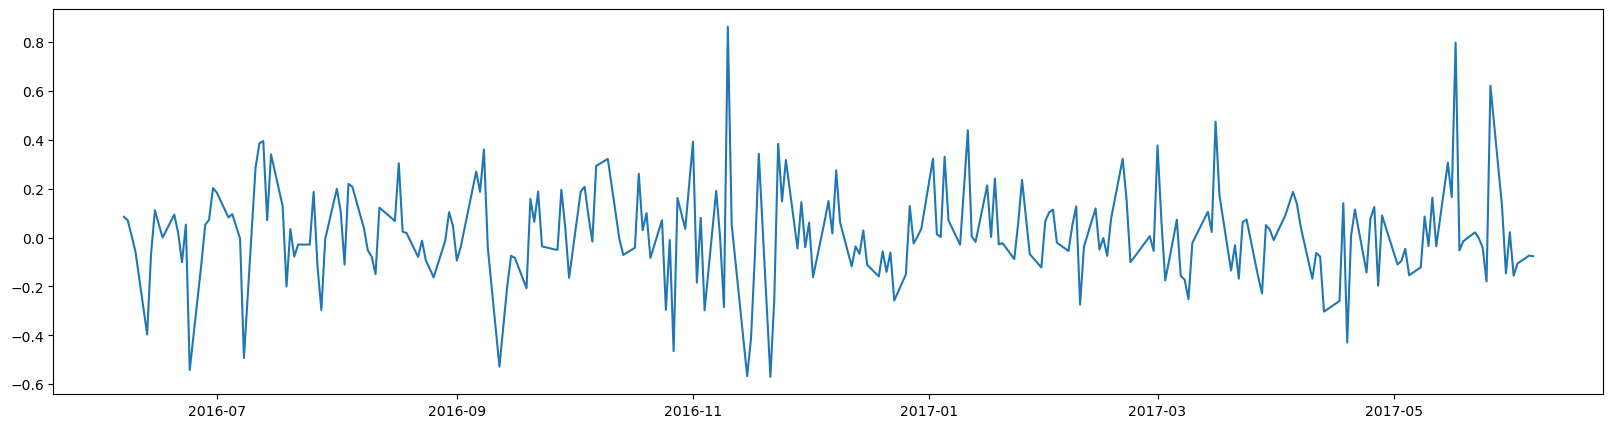

In [5]:
diff_sqrt_train = (sqrt_train - sqrt_train.shift()).dropna()
diff_sqrt_test = (sqrt_test - sqrt_test.shift()).dropna()
len(diff_sqrt_test)
plt.figure(figsize = (20,5))
plt.plot(diff_sqrt_test)

In [13]:
import warnings
warnings.filterwarnings('ignore')
import statsmodels.api as sm
model = sm.tsa.arima.ARIMA(diff_sqrt_train,order = (0,2,2)).fit()

In [7]:
s = len(train)
e = len(train) + len(test) - 1

diff_sqrt_predicted = model.predict(start = s,end = e,typ = 'levels')
diff_sqrt_predicted.index = test.index

from sklearn import metrics
from math import sqrt
# print(sqrt(metrics.mean_squared_error(diff_sqrt_predicted[1:],diff_sqrt_test)))
# diff_sqrt_predicted.head()

C:\Users\vidit\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


In [8]:
diff_sqrt_predicted_cumsum = diff_sqrt_predicted.cumsum()
base = pd.Series(sqrt_test.iloc[0],index = test.index)
sqrt_predicted = base.add(diff_sqrt_predicted_cumsum)
predicted = sqrt_predicted**2
# base

24.115624666202944


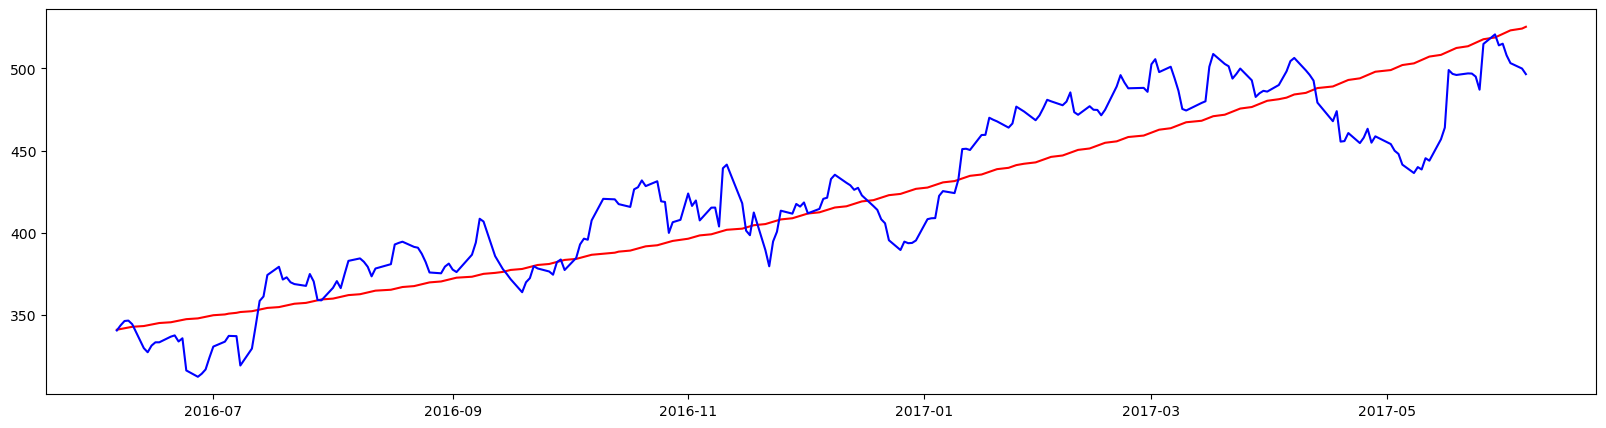

In [12]:
plt.figure(figsize = (20,5))
plt.plot(predicted,c = 'r')
plt.plot(test,c = 'b')
print(sqrt(metrics.mean_squared_error(predicted,test)))

In [10]:
# import warnings
# warnings.filterwarnings('ignore')
# for p in range(5):
#     for d in range(3):
#         for q in range(3):
#             model = sm.tsa.arima.ARIMA(diff_sqrt_train,order = (p,d,q)).fit()
#             diff_sqrt_predicted = model.predict(start = s,end = e,typ = 'levels')
#             diff_sqrt_predicted.index = test.index
#             diff_sqrt_predicted_cumsum = diff_sqrt_predicted.cumsum()
#             base = pd.Series(sqrt_test.iloc[0],index = test.index)
#             sqrt_predicted = base.add(diff_sqrt_predicted_cumsum)
#             predicted = sqrt_predicted**2
#             print(p,d,q,(metrics.mean_squared_error(predicted,test)))

97.99158282325641


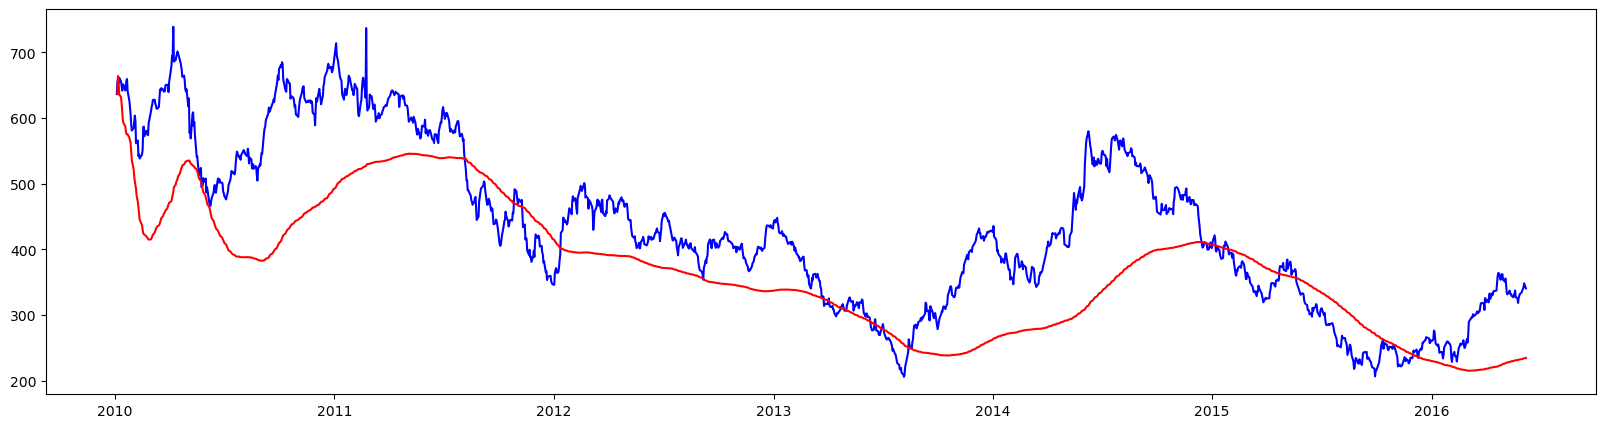

In [21]:

diff_sqrt_fit = model.fittedvalues
diff_sqrt_fit_cumsum = diff_sqrt_fit.cumsum()
baseSeries = pd.Series(sqrt_train.iloc[0],index = diff_sqrt_train.index)
sqrt_fit = baseSeries.add(diff_sqrt_fit_cumsum)
fitval = sqrt_fit**2
plt.figure(figsize = (20,5))
plt.plot(train,c = 'b')
plt.plot(fitval,c = 'r')
error = sqrt(metrics.mean_squared_error(train[1:],fitval))
print(error)